<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Binning/Discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# select the columns necessary

df = df.loc[:,['Fare','Age']].copy()
df.head()

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


In [5]:
# check for missing values
df.isna().sum()

Fare      0
Age     177
dtype: int64

The age has missing values and imputed with median because it contains outliers as well.

In [7]:
# impute the missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

trans = ColumnTransformer(transformers=[
    ('impute_age',SimpleImputer(strategy='median'),['Age'])
],remainder='passthrough')

df_trans = pd.DataFrame(trans.fit_transform(df),columns=['Age','Fare'])
df_trans

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [8]:
df_trans.isna().sum()

Age     0
Fare    0
dtype: int64

In [17]:
kbins = KBinsDiscretizer(n_bins=5,encode='onehot',strategy='uniform')
bin_trans = ColumnTransformer(transformers=[
      ('binning',kbins,['Age','Fare'])])

bin_trans.fit_transform(df_trans).toarray().shape

(891, 10)

In [18]:
from sklearn.preprocessing import KBinsDiscretizer
def binning(bins,strategy):
  kbins = KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
  bin_trans = ColumnTransformer(transformers=[
      ('binning',kbins,['Age','Fare'])
  ])

  df = pd.DataFrame(bin_trans.fit_transform(df_trans),columns=['Age','Fare'])
  for col in df.columns:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(x=col,data=df_trans,kde=True)
    plt.title('Before binning')

    plt.subplot(1,2,2)
    sns.histplot(x=col,data=df,kde=True)
    plt.title('After binning')

    plt.show()
  
  return df

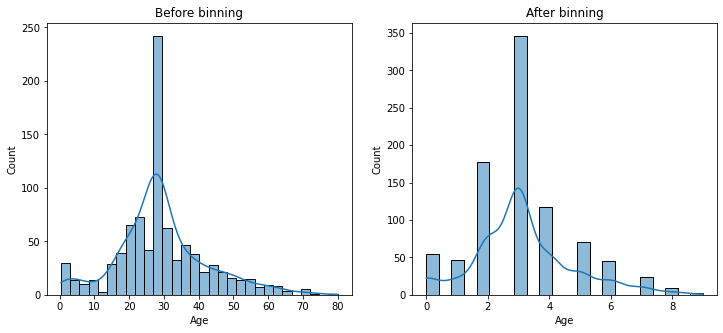

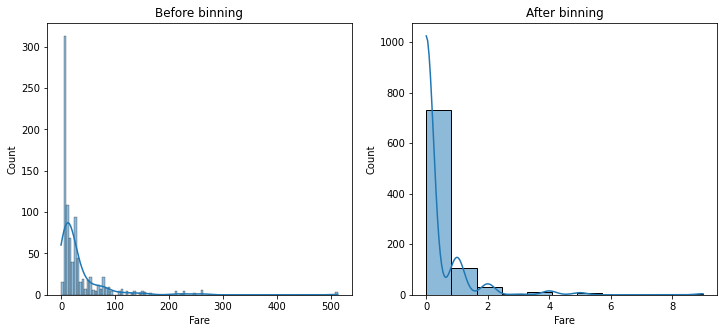

,Age,Fare
0,2.0,0.0
1,4.0,1.0
2,3.0,0.0
3,4.0,1.0
4,4.0,0.0
...,...,...
886,3.0,0.0
887,2.0,0.0
888,3.0,0.0
889,3.0,0.0


In [24]:
binning(10,'uniform')

In [21]:
data.head()

,Age,Fare
0,2.0,0.0
1,4.0,1.0
2,3.0,0.0
3,4.0,1.0
4,4.0,0.0


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


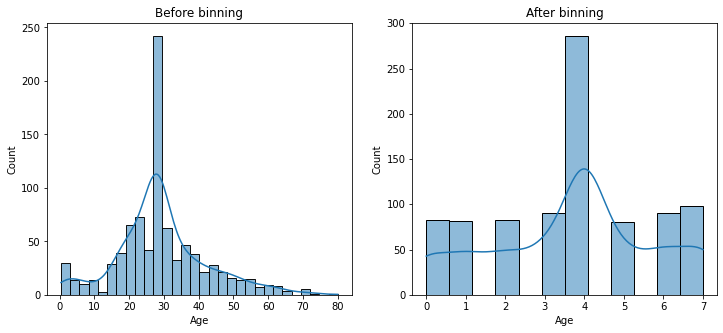

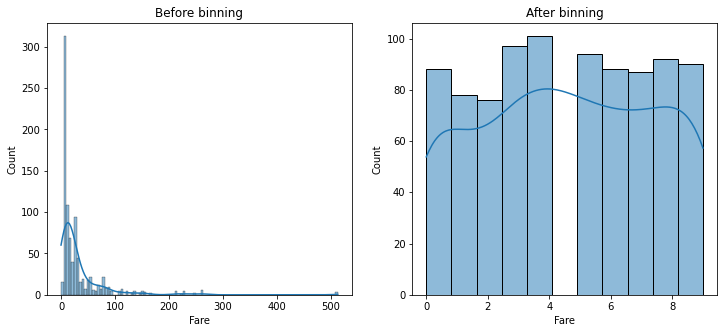

,Age,Fare
0,2.0,0.0
1,6.0,8.0
2,3.0,2.0
3,5.0,8.0
4,5.0,3.0
...,...,...
886,3.0,4.0
887,1.0,7.0
888,4.0,6.0
889,3.0,7.0


In [25]:
binning(10,'quantile')

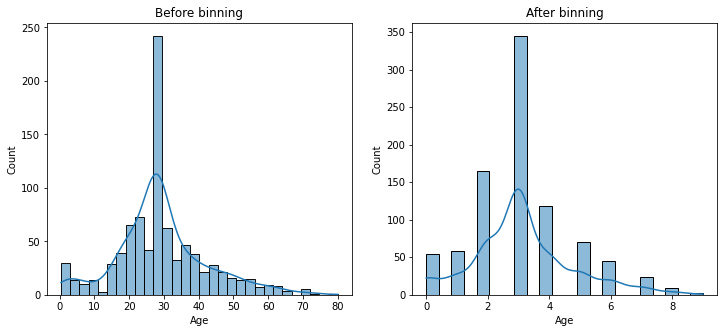

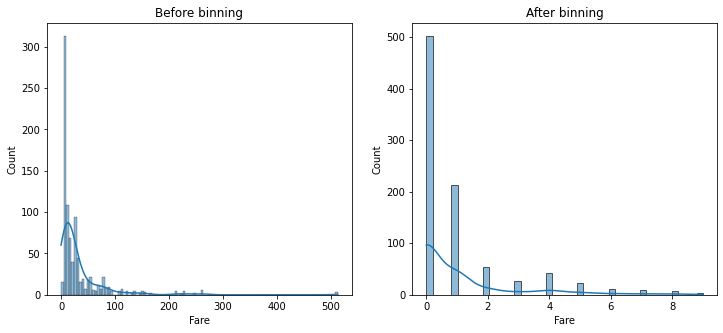

In [27]:
df = binning(10,'kmeans')

In [28]:
df

,Age,Fare
0,2.0,0.0
1,4.0,3.0
2,3.0,0.0
3,4.0,2.0
4,4.0,0.0
...,...,...
886,3.0,0.0
887,2.0,1.0
888,3.0,1.0
889,3.0,1.0


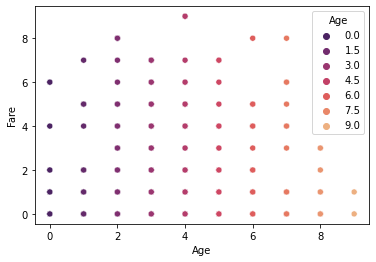

In [37]:
sns.scatterplot(x='Age',y='Fare',data=df,hue='Age',palette='flare_r')